In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing Data and formatting (Pre-processing)

In [3]:
data_sub_08 = pd.read_csv(r'C:\Users\Dell\Desktop\workload-estimation\STEW Dataset\sub08_hi.txt', sep='   ')
columns = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

data_sub_08.columns = columns
data_sub_08.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_20192\479857094.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_sub_08 = pd.read_csv(r'C:\Users\Dell\Desktop\workload-estimation\STEW Dataset\sub08_hi.txt', sep='   ')


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4602.05,4761.54,4454.36,4586.15,4303.59,4553.33,4489.74,4343.59,4278.46,4873.85,4515.90,4554.87,4601.03,4464.10
1,4601.54,4761.54,4449.23,4584.10,4304.10,4556.41,4492.82,4349.74,4280.00,4875.90,4514.36,4548.72,4601.03,4454.87
2,4598.46,4755.38,4449.74,4582.56,4299.49,4553.33,4492.82,4352.31,4281.03,4872.82,4510.77,4551.79,4599.49,4457.95
3,4598.97,4751.28,4453.33,4585.13,4294.87,4549.74,4488.72,4350.77,4278.46,4873.33,4512.31,4554.87,4598.46,4462.56
4,4595.90,4758.97,4450.26,4584.10,4296.41,4552.82,4489.23,4350.77,4281.03,4872.82,4512.82,4552.31,4600.51,4460.51


In [4]:
data_sub_08.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19199 entries, 0 to 19198
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     19199 non-null  float64
 1   F7      19199 non-null  float64
 2   F3      19199 non-null  float64
 3   FC5     19199 non-null  float64
 4   T7      19199 non-null  float64
 5   P7      19199 non-null  float64
 6   O1      19199 non-null  float64
 7   O2      19199 non-null  float64
 8   P8      19199 non-null  float64
 9   T8      19199 non-null  float64
 10  FC6     19199 non-null  float64
 11  F4      19199 non-null  float64
 12  F8      19199 non-null  float64
 13  AF4     19199 non-null  float64
dtypes: float64(14)
memory usage: 2.1 MB


#### EEG Channel Amplitude vs Time

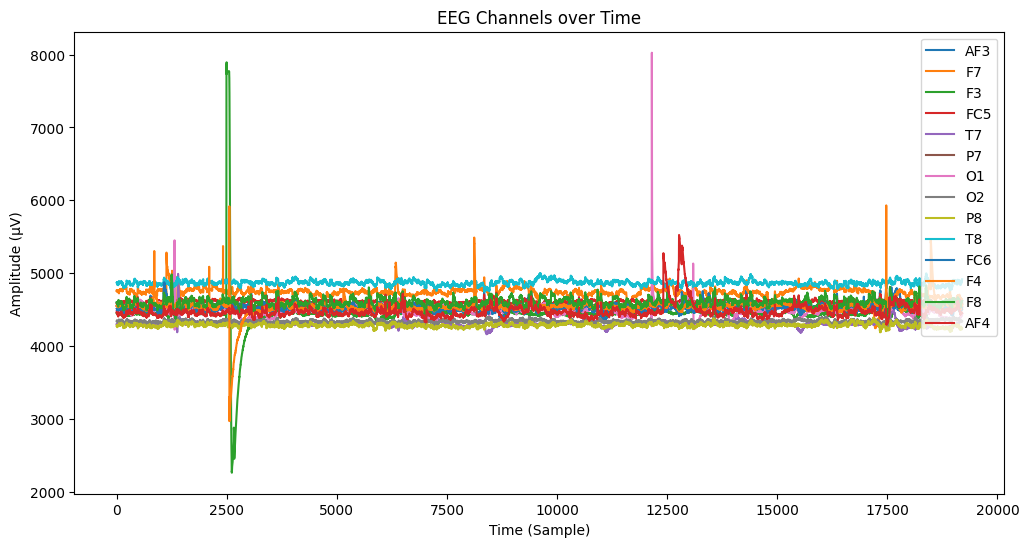

In [5]:
plt.figure(figsize=(12, 6))
for column in data_sub_08.columns:
    plt.plot(data_sub_08.index, data_sub_08[column], label=column)

plt.title("EEG Channels over Time")
plt.xlabel("Time (Sample)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc="upper right")
plt.show()

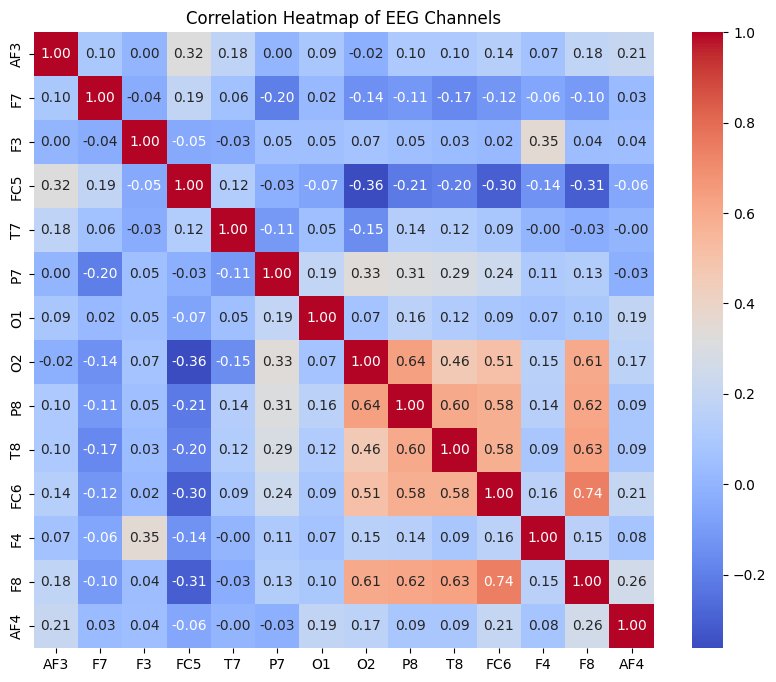

In [6]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data_sub_08.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of EEG Channels")
plt.show()

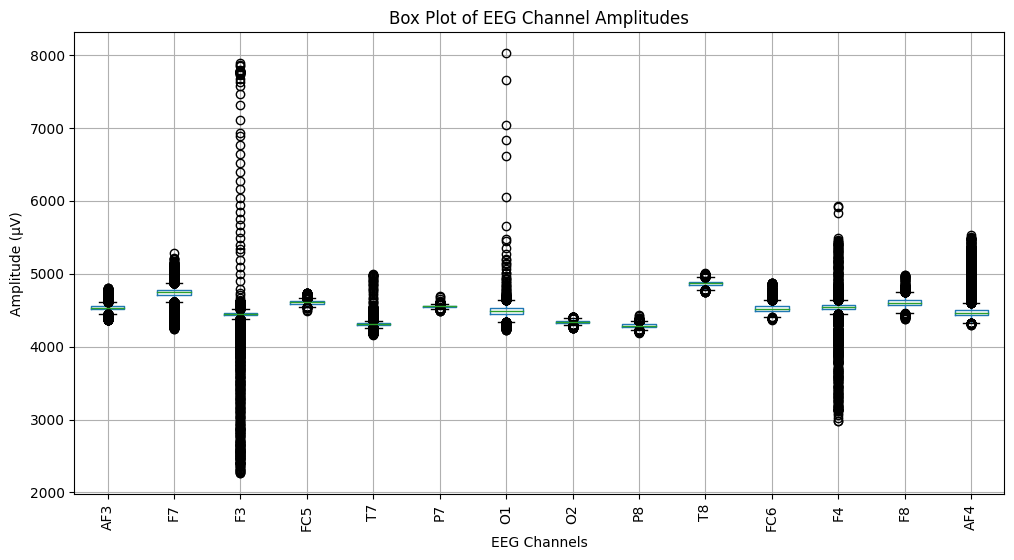

In [7]:
plt.figure(figsize=(12, 6))
data_sub_08.boxplot()
plt.title("Box Plot of EEG Channel Amplitudes")
plt.xlabel("EEG Channels")
plt.ylabel("Amplitude (µV)")
plt.xticks(rotation=90)
plt.show()


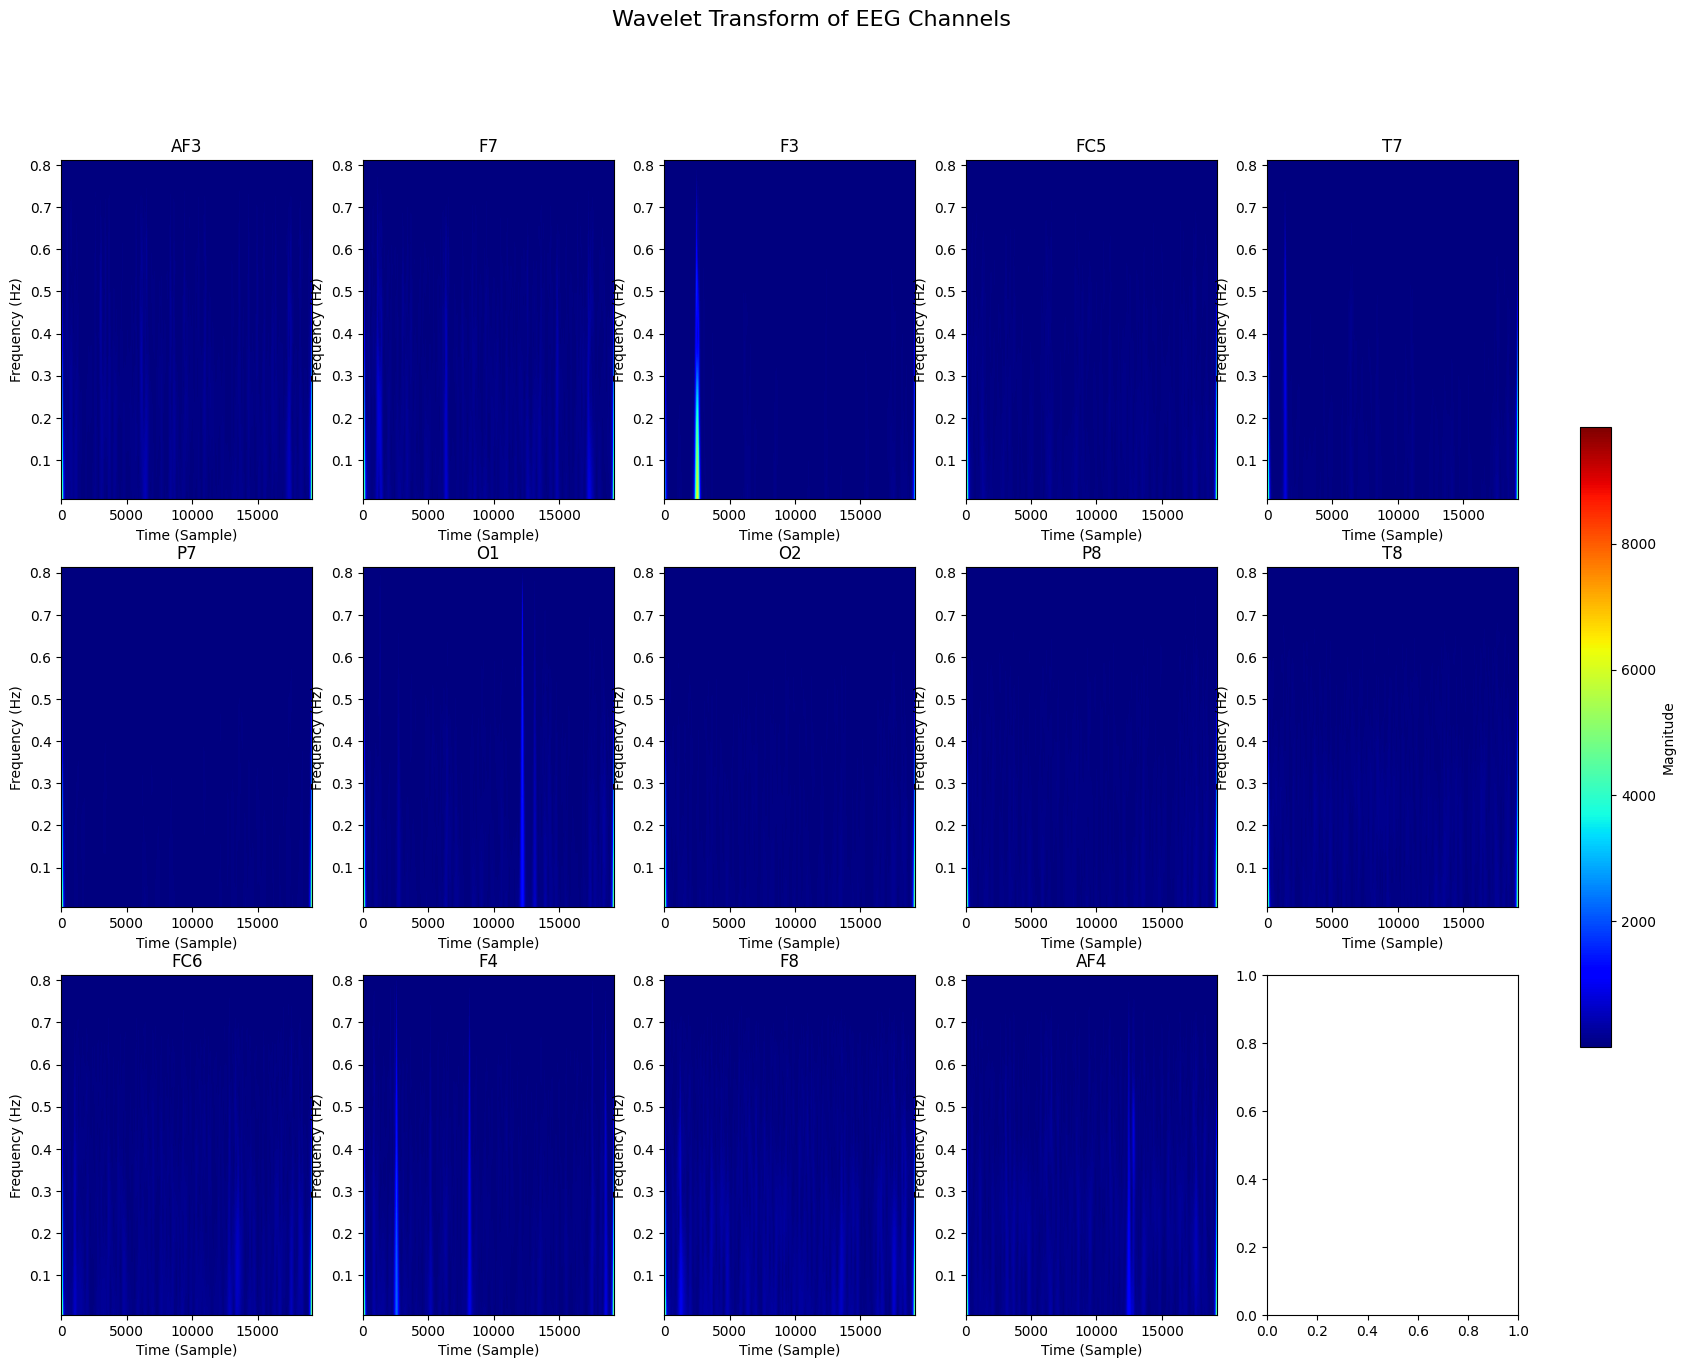

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# List of EEG channels
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# Set up subplots (number of rows = 3, number of columns = 5)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
fig.suptitle('Wavelet Transform of EEG Channels', fontsize=16)


for i, channel in enumerate(channels):
    row, col = divmod(i, 5)
    channel_data = data_sub_08[channel]  # Assuming 'df' contains EEG data

    # Perform Continuous Wavelet Transform (CWT)
    coefficients, frequencies = pywt.cwt(channel_data, scales=np.arange(1, 128), wavelet='morl')

    # Plot the wavelet transform in the corresponding subplot
    im = axes[row, col].imshow(np.abs(coefficients), aspect='auto',
                               extent=[0, len(channel_data), frequencies.min(), frequencies.max()], cmap='jet')
    axes[row, col].set_title(channel)
    axes[row, col].set_xlabel("Time (Sample)")
    axes[row, col].set_ylabel("Frequency (Hz)")

cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Magnitude')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

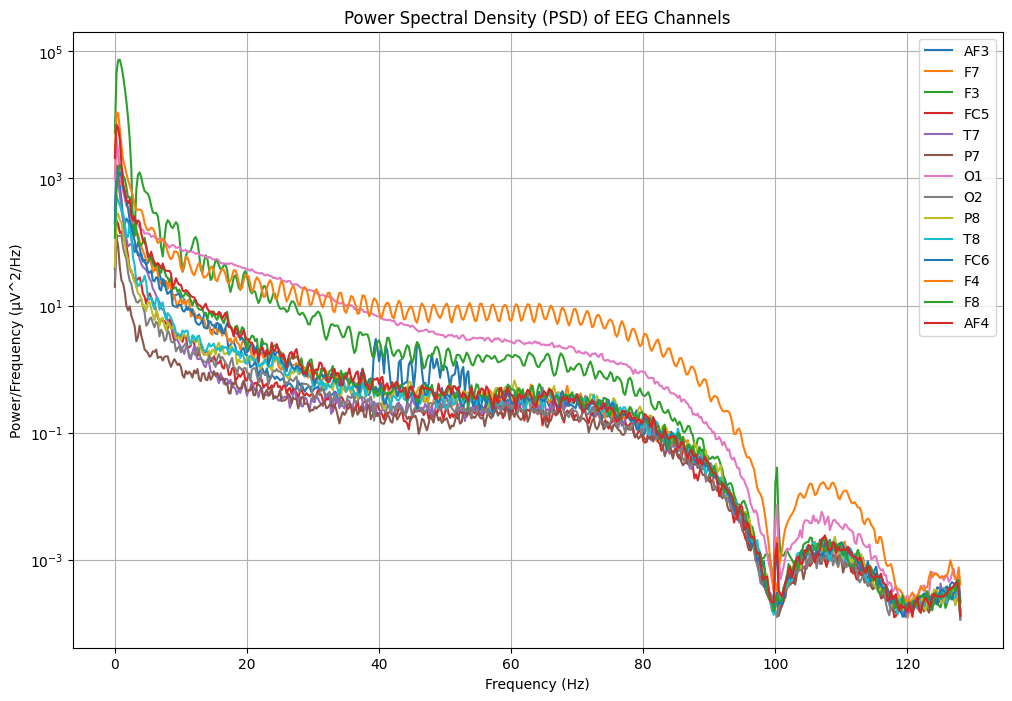

In [25]:
from scipy.signal import welch
import matplotlib.pyplot as plt

# Dictionary to store the PSD for each channel
psd_dict = {}

# Plot the PSD for each channel
plt.figure(figsize=(12, 8))

for column in data_sub_08.columns:
    # Calculate the Power Spectral Density using the Welch method
    f, Pxx = welch(data_sub_08[column], fs=256, nperseg=1024)  # Assuming a sampling frequency (fs) of 256 Hz
    
    # Save the PSD in a dictionary
    psd_dict[column] = (f, Pxx)  # Store both frequency and power values
    
    # Plot each channel's PSD
    plt.semilogy(f, Pxx, label=column)

plt.title("Power Spectral Density (PSD) of EEG Channels")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (µV^2/Hz)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [1]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Assuming your EEG data is loaded into a DataFrame called df
# Initialize empty dictionaries to store AIC and BIC for each channel
aic_values = {}
bic_values = {}

# Define a range of lag orders to try (e.g., 1 to 20)
max_lag = 20

# Loop through each channel
for column in data_sub_08.columns:
    aic_for_channel = []
    bic_for_channel = []

    # Fit AR models for different lag orders
    for lag_order in range(1, max_lag + 1):
        model = AutoReg(data_sub_08[column], lags=lag_order).fit()
        aic_for_channel.append(model.aic)
        bic_for_channel.append(model.bic)

    # Store the results
    aic_values[column] = aic_for_channel
    bic_values[column] = bic_for_channel

    # Find optimal lag based on AIC/BIC
    optimal_lag_aic = np.argmin(aic_for_channel) + 1  # +1 because index starts from 0
    optimal_lag_bic = np.argmin(bic_for_channel) + 1

    print(f"Optimal lag order for {column} based on AIC: {optimal_lag_aic}")
    print(f"Optimal lag order for {column} based on BIC: {optimal_lag_bic}")


Optimal lag order for AF3 based on AIC: 20
Optimal lag order for AF3 based on BIC: 20
Optimal lag order for F7 based on AIC: 20
Optimal lag order for F7 based on BIC: 20
Optimal lag order for F3 based on AIC: 20
Optimal lag order for F3 based on BIC: 19
Optimal lag order for FC5 based on AIC: 20
Optimal lag order for FC5 based on BIC: 20
Optimal lag order for T7 based on AIC: 20
Optimal lag order for T7 based on BIC: 20
Optimal lag order for P7 based on AIC: 20
Optimal lag order for P7 based on BIC: 20
Optimal lag order for O1 based on AIC: 20
Optimal lag order for O1 based on BIC: 20
Optimal lag order for O2 based on AIC: 20
Optimal lag order for O2 based on BIC: 20
Optimal lag order for P8 based on AIC: 20
Optimal lag order for P8 based on BIC: 20
Optimal lag order for T8 based on AIC: 20
Optimal lag order for T8 based on BIC: 20
Optimal lag order for FC6 based on AIC: 20
Optimal lag order for FC6 based on BIC: 20
Optimal lag order for F4 based on AIC: 20
Optimal lag order for F4 bas

AR Coefficients for AF3: const      30.966812
AF3.L1      2.313976
AF3.L2     -3.083047
AF3.L3      3.574397
AF3.L4     -3.314320
AF3.L5      2.673818
AF3.L6     -1.779006
AF3.L7      0.907642
AF3.L8     -0.551977
AF3.L9      0.440256
AF3.L10    -0.536586
AF3.L11     0.729020
AF3.L12    -0.710748
AF3.L13     0.497213
AF3.L14    -0.099429
AF3.L15    -0.302251
AF3.L16     0.546191
AF3.L17    -0.633910
AF3.L18     0.506212
AF3.L19    -0.259512
AF3.L20     0.075234
dtype: float64
AR Coefficients for F7: const     16.652716
F7.L1      2.362261
F7.L2     -3.144362
F7.L3      3.735365
F7.L4     -3.613353
F7.L5      2.867661
F7.L6     -1.939946
F7.L7      1.099985
F7.L8     -0.572773
F7.L9      0.435474
F7.L10    -0.582936
F7.L11     0.767715
F7.L12    -0.796993
F7.L13     0.591632
F7.L14    -0.199969
F7.L15    -0.232353
F7.L16     0.533835
F7.L17    -0.608303
F7.L18     0.501064
F7.L19    -0.309832
F7.L20     0.102312
dtype: float64
AR Coefficients for F3: const     9.682927
F3.L1     2.85218

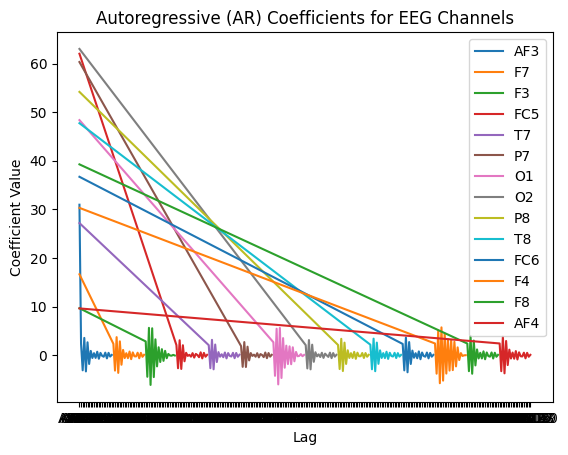

In [11]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Dictionary to store AR coefficients for each channel
ar_coefficients = {}

# Fit the AR model for each channel using the identified optimal lag order
for column in data_sub_08.columns:
    # Use the corresponding optimal lag order (20 for most channels)
    lag_order = 20 if column != 'F3' else 19
    
    model = AutoReg(data_sub_08[column], lags=lag_order).fit()
    ar_coefficients[column] = model.params

    # Print the AR coefficients for each channel
    print(f"AR Coefficients for {column}: {model.params}")

    # Optionally, plot the AR coefficients for each channel
    plt.plot(model.params, label=column)

plt.title("Autoregressive (AR) Coefficients for EEG Channels")
plt.xlabel("Lag")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

In [15]:
import numpy as np
import pandas as pd

def vectorized_apen(U, m, r):
    """Vectorized Approximate Entropy calculation"""
    N = len(U)
    
    def _phi(m):
        xmi = np.array([U[i:i+m] for i in range(N - m + 1)])
        xmj = xmi[:, np.newaxis, :]
        
        # Vectorized maximum distance calculation
        d = np.max(np.abs(xmi[:, np.newaxis] - xmj), axis=2)
        
        # Count similar patterns and apply logarithm
        C = np.sum(d <= r, axis=1) / (N - m + 1.0)
        return np.mean(np.log(C))
    
    return abs(_phi(m + 1) - _phi(m))

def calculate_apen(data, m=2, r=None):
    """Calculate ApEn for all columns efficiently"""
    if r is None:
        r = 0.2 * np.std(data, axis=0)
    
    return np.array([vectorized_apen(col, m, r_col) for col, r_col in zip(data.T, r)])


# Calculate ApEn for all columns
apen_results = calculate_apen(data_sub_08.values)

# Print results
for column, apen_value in zip(data_sub_08.columns, apen_results):
    print(f"ApEn for {column}: {apen_value}")

ApEn for AF3: 5.209011591134072e-05
ApEn for F7: 5.209011591134072e-05
ApEn for F3: 5.209011591134072e-05
ApEn for FC5: 5.209011591134072e-05
ApEn for T7: 5.209011591134072e-05
ApEn for P7: 5.209011591134072e-05
ApEn for O1: 5.209011591134072e-05
ApEn for O2: 5.209011591134072e-05
ApEn for P8: 5.209011591134072e-05
ApEn for T8: 5.209011591134072e-05
ApEn for FC6: 5.209011591134072e-05
ApEn for F4: 5.209011591134072e-05
ApEn for F8: 5.209011591134072e-05
ApEn for AF4: 5.209011591134072e-05


In [18]:
import numpy as np
from scipy import stats

def hurst_exponent(time_series):
    """
    Calculate Hurst exponent using rescaled range (R/S) method.
    
    H = log(R/S) / log(T)
    
    where:
    T is the duration of the sample of time series
    R is the difference between the maximum and minimum accumulated deviation from the mean
    S is the standard deviation
    
    Parameters:
    time_series (array-like): The time series data
    
    Returns:
    float: The Hurst exponent, or np.nan if it can't be calculated
    """
    T = len(time_series)
    if T < 100:  # Ensure sufficient data points
        return np.nan
    
    # Calculate the mean of the time series
    mean = np.mean(time_series)
    
    # Calculate the accumulated deviation from the mean
    dev_from_mean = time_series - mean
    accumulated_dev = np.cumsum(dev_from_mean)
    
    # Calculate R (range of accumulated deviation)
    R = np.max(accumulated_dev) - np.min(accumulated_dev)
    
    # Calculate S (standard deviation of the time series)
    S = np.std(time_series)
    
    # Calculate the Hurst exponent
    if R == 0 or S == 0:
        return np.nan
    
    H = np.log(R/S) / np.log(T)
    
    return H

def calculate_hurst_for_dataframe(df):
    """
    Calculate Hurst exponent for all columns in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input data
    
    Returns:
    dict: A dictionary with column names as keys and Hurst exponents as values
    """
    results = {}
    for column in df.columns:
        hurst = hurst_exponent(df[column].values)
        results[column] = hurst
    return results



# Calculate Hurst exponents
hurst_results = calculate_hurst_for_dataframe(data_sub_08)

# Print results
for column, hurst_value in hurst_results.items():
    if np.isnan(hurst_value):
        print(f"Hurst Exponent for {column}: Unable to calculate (possibly due to insufficient data points or numerical issues)")
    else:
        print(f"Hurst Exponent for {column}: {hurst_value:.4f}")
        
# Interpret results
for column, hurst_value in hurst_results.items():
    if np.isnan(hurst_value):
        print(f"{column}: Unable to interpret (calculation failed)")
    elif hurst_value == 0.5:
        print(f"{column}: H = 0.5, indicating no correlation in the time series")
    elif 0 < hurst_value < 0.5:
        print(f"{column}: 0 < H < 0.5, indicating long-term anti-correlations")
    elif 0.5 < hurst_value < 1:
        print(f"{column}: 0.5 < H < 1, indicating long-term correlations")
    else:
        print(f"{column}: H outside expected range (0-1), possible calculation issue")

Hurst Exponent for AF3: 0.7481
Hurst Exponent for F7: 0.7998
Hurst Exponent for F3: 0.7581
Hurst Exponent for FC5: 0.7579
Hurst Exponent for T7: 0.7506
Hurst Exponent for P7: 0.7861
Hurst Exponent for O1: 0.7692
Hurst Exponent for O2: 0.7642
Hurst Exponent for P8: 0.7881
Hurst Exponent for T8: 0.7636
Hurst Exponent for FC6: 0.7548
Hurst Exponent for F4: 0.7761
Hurst Exponent for F8: 0.7119
Hurst Exponent for AF4: 0.8028
AF3: 0.5 < H < 1, indicating long-term correlations
F7: 0.5 < H < 1, indicating long-term correlations
F3: 0.5 < H < 1, indicating long-term correlations
FC5: 0.5 < H < 1, indicating long-term correlations
T7: 0.5 < H < 1, indicating long-term correlations
P7: 0.5 < H < 1, indicating long-term correlations
O1: 0.5 < H < 1, indicating long-term correlations
O2: 0.5 < H < 1, indicating long-term correlations
P8: 0.5 < H < 1, indicating long-term correlations
T8: 0.5 < H < 1, indicating long-term correlations
FC6: 0.5 < H < 1, indicating long-term correlations
F4: 0.5 < H 

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def calculate_time_domain_features(df):
    """
    Calculate time domain features for each channel in the EEG data.
    
    Parameters:
    df (pandas.DataFrame): The input EEG data
    
    Returns:
    pandas.DataFrame: A DataFrame containing the time domain features for each channel
    """
    features = pd.DataFrame(index=df.columns)
    
    # Calculate mean
    features['Mean'] = df.mean()
    
    # Calculate standard deviation
    features['Standard Deviation'] = df.std()
    
    # Calculate skewness
    features['Skewness'] = df.apply(skew)
    
    # Calculate kurtosis
    features['Kurtosis'] = df.apply(kurtosis)
    
    return features


# Calculate time domain features
time_domain_features = calculate_time_domain_features(data_sub_08)

# Display the results
print(time_domain_features)

            Mean  Standard Deviation   Skewness    Kurtosis
AF3  4534.602982           46.373108   1.216885    5.975771
F7   4738.281059           71.196400  -1.340366   10.919243
F3   4446.224854          270.120685   4.682254   96.863157
FC5  4606.963332           21.979240   0.652204    2.057077
T7   4307.610760           38.590706   5.219627   79.264495
P7   4548.564225           13.138452   0.518416    3.041101
O1   4487.756597           80.455359  12.581820  449.965494
O2   4342.749079           18.476108   0.103645    0.363329
P8   4288.875955           24.062686   0.213788    0.516749
T8   4868.976984           32.988247   0.201156    0.511106
FC6  4526.224926           45.836574   1.385845    5.996879
F4   4537.101244          114.715676  -4.832533   67.229392
F8   4602.960276           55.716612   0.519325    1.586719
AF4  4481.518893          101.695447   4.863034   33.316015


In [21]:
# Interpretation of results
print("\nInterpretation of results:")
for channel in time_domain_features.index:
    print(f"\nChannel: {channel}")
    print(f"  Mean: {time_domain_features.loc[channel, 'Mean']:.4f}")
    print(f"  Standard Deviation: {time_domain_features.loc[channel, 'Standard Deviation']:.4f}")
    
    skewness = time_domain_features.loc[channel, 'Skewness']
    if abs(skewness) < 0.5:
        skew_interpretation = "approximately symmetric"
    elif 0.5 <= abs(skewness) < 1:
        skew_interpretation = "moderately skewed"
    else:
        skew_interpretation = "highly skewed"
    print(f"  Skewness: {skewness:.4f} ({skew_interpretation})")
    
    kurt = time_domain_features.loc[channel, 'Kurtosis']
    if kurt < 0:
        kurt_interpretation = "platykurtic (lighter tails than normal distribution)"
    elif abs(kurt) < 0.5:
        kurt_interpretation = "approximately mesokurtic (close to normal distribution)"
    else:
        kurt_interpretation = "leptokurtic (heavier tails than normal distribution)"
    print(f"  Kurtosis: {kurt:.4f} ({kurt_interpretation})")


Interpretation of results:

Channel: AF3
  Mean: 4534.6030
  Standard Deviation: 46.3731
  Skewness: 1.2169 (highly skewed)
  Kurtosis: 5.9758 (leptokurtic (heavier tails than normal distribution))

Channel: F7
  Mean: 4738.2811
  Standard Deviation: 71.1964
  Skewness: -1.3404 (highly skewed)
  Kurtosis: 10.9192 (leptokurtic (heavier tails than normal distribution))

Channel: F3
  Mean: 4446.2249
  Standard Deviation: 270.1207
  Skewness: 4.6823 (highly skewed)
  Kurtosis: 96.8632 (leptokurtic (heavier tails than normal distribution))

Channel: FC5
  Mean: 4606.9633
  Standard Deviation: 21.9792
  Skewness: 0.6522 (moderately skewed)
  Kurtosis: 2.0571 (leptokurtic (heavier tails than normal distribution))

Channel: T7
  Mean: 4307.6108
  Standard Deviation: 38.5907
  Skewness: 5.2196 (highly skewed)
  Kurtosis: 79.2645 (leptokurtic (heavier tails than normal distribution))

Channel: P7
  Mean: 4548.5642
  Standard Deviation: 13.1385
  Skewness: 0.5184 (moderately skewed)
  Kurtosis: